# Introduction.

Let's play a game, we are going to pick the students that are late today as volunteers. I want to know who has the best accuracy at trhowing a coin, so we are going to make this students throw the coin and compare their performance.

By now we have an ordered list based on accuracy. What have we measured with our experiment?

    a)We measure hability and so the first student has supperior skills and will always perform better.
    b)We need more experiments, as one or few measurements cannot determine habilities. (Regression to the mean).
    
Let's repeat the experiment and see our team performance.

Regression to the mean is a very tricky topic, in fact, whenever a lawyer needs to explain regression to the mean to the Jury, they know they will end up losing the case.


    Axiom: Each player has a skill value, represented by a continuous variable.

Note that we made a sample. Because of this, it may be that our best performance student just happened to be lucky and that the worst player just had a bad day.

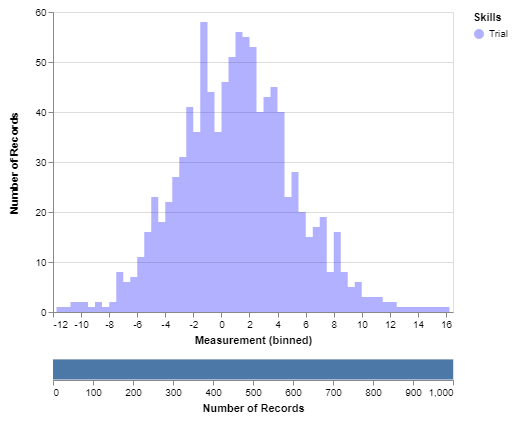

In [54]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Trial': np.random.normal(1, 4, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)
interval = alt.selection_interval(encodings=['x'])

ats = alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step',
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000']))
    ).add_selection(
    interval
)

hist = alt.Chart(source).mark_bar().encode(
alt.X('count()')).transform_filter(interval)

ats & hist

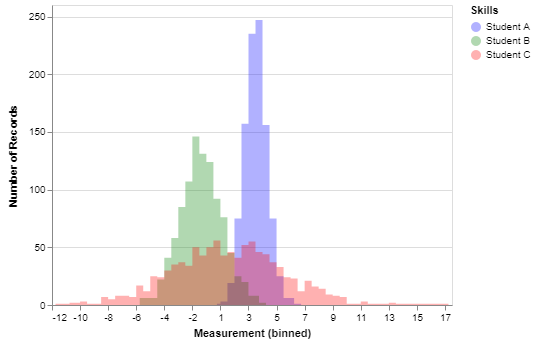

In [31]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

# Generating Data
source = pd.DataFrame({'Student A': np.random.normal(3, 0.8, 1000),
                   'Student B': np.random.normal(-1, 1.5, 1000),
                   'Student C': np.random.normal(1, 4, 1000)})

# Tidying Data
source = pd.melt(
    source,
    id_vars=source.index.name,
    value_vars=source.columns,
    var_name='Skills',
    value_name='Measurement'
)

alt.Chart(source).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('Measurement', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color(
        'Skills',
        scale=alt.Scale(range=['#0000ff', '#008000', '#ff0000'])
    )
)

Today we will target this problem of evaluating performance. We will work on the case of Chess and the case of Xbox players.

## Chess

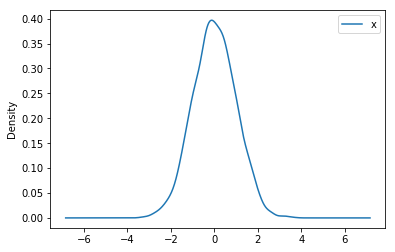

In [19]:
import altair as alt
alt.renderers.enable('notebook')
import numpy as np
import pandas as pd
data = np.random.normal(0,1,4000)
#print(data[:30])
df = pd.DataFrame({
    'x': data})
ax = df.plot.kde()
#make a normal distribution

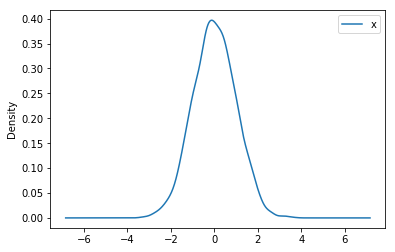

In [20]:

ax = df.plot.kde()

In [22]:
alt.Chart(df).mark_line().encode(
    ##alt.Color('x', bin=True),
    alt.X('x:Q', bin = True),
    alt.Y('count()')
)

ValueError: count()/40000 encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

Chart({
  data:              x
  0     0.047319
  1    -0.011627
  2    -0.721739
  3     2.091021
  4     0.085253
  5    -0.107540
  6    -0.867805
  7     0.240752
  8     1.524388
  9     1.249152
  10   -1.249987
  11   -1.614503
  12   -1.956594
  13    1.075608
  14    1.739683
  15    1.138768
  16   -0.464595
  17   -1.156141
  18    2.014165
  19    1.846699
  20   -1.245320
  21    0.487045
  22   -0.100506
  23    0.449965
  24   -0.609767
  25   -1.021957
  26   -0.691848
  27    0.383789
  28   -0.558868
  29    0.351977
  ...        ...
  3970 -0.236086
  3971  0.039788
  3972  0.113388
  3973 -1.052877
  3974 -0.061842
  3975  2.050183
  3976 -1.265109
  3977 -0.550120
  3978  0.413864
  3979 -1.090184
  3980 -2.378988
  3981 -0.124854
  3982  0.835292
  3983  1.307242
  3984 -0.949625
  3985  0.905953
  3986 -0.644675
  3987 -0.761458
  3988 -0.135095
  3989  0.392006
  3990 -0.451314
  3991 -0.037707
  3992 -0.562488
  3993 -0.278426
  3994 -2.181555
  3995  3.164247


## Xbox

Let's look at the data that we have:

In [1]:
import pandas
df = pandas.read_csv('Data/TrueSkill_Halo2-HeadToHead_Games[160_to_167].csv')
print(df)

      Player1     Player2  Player1Score  Player2Score  \
0  Gamer00123  Gamer00103             0             2   
1  Gamer00044  Gamer00094             2             4   
2  Gamer00139  Gamer00074             2             5   
3  Gamer00095  Gamer00140             2             2   
4  Gamer00120  Gamer00141             5             1   
5  Gamer00142  Gamer00143             5             2   
6  Gamer00144  Gamer00122             1             1   
7  Gamer00116  Gamer00145             5             0   

                    Players  Scores     Outcome  Draw Proportion      Id  \
0  {Gamer00123, Gamer00103}  {0, 2}  Player2Win                0  282203   
1  {Gamer00044, Gamer00094}  {2, 4}  Player2Win                0  282201   
2  {Gamer00139, Gamer00074}  {2, 5}  Player2Win                0  282205   
3  {Gamer00095, Gamer00140}  {2, 2}        Draw                1  282211   
4  {Gamer00120, Gamer00141}  {5, 1}  Player1Win                0  282209   
5  {Gamer00142, Gamer00143}  {